In [1]:
%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1,'../src')
sys.path.insert(1,'../')

matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']
from __future__ import print_function
import timeit
from ellipsoid import *

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Mixture of two Gaussians

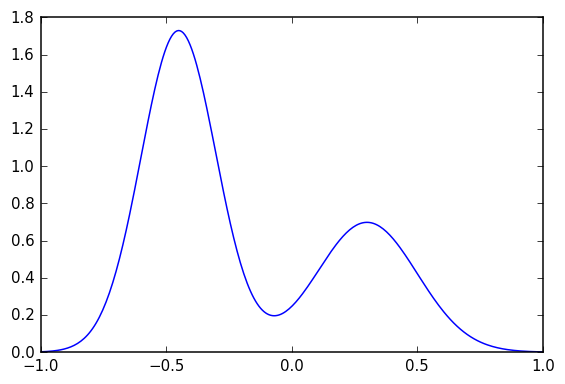

In [2]:
mixture_params = ((.65, -.45, .15), (.35, .3, .2))
distribution = mixture_distribution([normal_distribution(-.45, .15), normal_distribution(.3, .2)], [.65, .35])
fig = plot_distribution(distribution, (-1, 1))

### We draw 20000 samples

In [3]:
n = 1000000
samples = sorted(distribution.draw_samples(n))

smin = np.min(samples) - 1e-3
smax = np.max(samples) + 1e-3
print('n = {}  min = {}  max = {}'.format(n, np.min(samples), np.max(samples)))

n = 1000000  min = -1.16711897643  max = 1.14222196061


The plot only shows a subset of the samples.

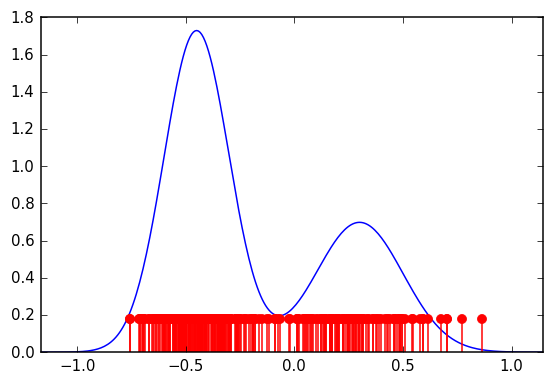

In [4]:
fig = plot_distribution_with_samples(distribution, np.random.choice(samples, 300), (smin, smax))

### Let's run our algorithm
We want 4 or 5 pieces of degree 5 and start with 20 intervals of equal empirical mass.

In [5]:
%%time
t = 4
d = 5
U = d * d * (math.sqrt(2) + 1.0)**d
eps = math.sqrt(t * d / float(n))
print('eps estimate = {}'.format(eps))
akproj_gap_tolerance = eps * eps * 0.5
print('akproj_gap_tolerance = {}'.format(akproj_gap_tolerance))
#num_pieces = int(math.ceil(t / eps))
num_initial_pieces = 200
print('Upper bound = {}  Num initial pieces = {}'.format(U, num_initial_pieces))
cvxopt.solvers.options['show_progress'] = False

start = timeit.default_timer()
%prun res = pp_learning(t, d, num_initial_pieces, (smin, smax), samples, verbose=1, akproj_num_iter=200, akproj_upper_bound=U, akproj_gap_tolerance=akproj_gap_tolerance)
stop = timeit.default_timer()

print("timeit time: {} seconds".format(float(stop - start)))

eps estimate = 0.004472135955
akproj_gap_tolerance = 1e-05
Upper bound = 2050.30483272  Num initial pieces = 200
Computing initial pieces
num oracle = 35  num_newton = 314

num oracle = 17  num_newton = 126

num oracle = 18  num_newton = 316

num oracle = 19  num_newton = 308

num oracle = 15  num_newton = 266

num oracle = 13  num_newton = 100

num oracle = 12  num_newton = 111

num oracle = 13  num_newton = 121

num oracle = 11  num_newton = 123

num oracle = 10  num_newton = 108

num oracle = 11  num_newton = 233

num oracle = 12  num_newton = 214

num oracle = 11  num_newton = 209

num oracle = 9  num_newton = 109

num oracle = 11  num_newton = 267

num oracle = 10  num_newton = 220

num oracle = 11  num_newton = 245

num oracle = 11  num_newton = 256

num oracle = 10  num_newton = 223

num oracle = 12  num_newton = 221

num oracle = 11  num_newton = 272

num oracle = 9  num_newton = 199

num oracle = 10  num_newton = 230

num oracle = 9  num_newton = 62

num oracle = 8  num_newton

The running time is quite long, but there are better cutting plane methods to make things faster. Also, only part of the code is in C++ at the moment.

### Result

Error $\varepsilon$ in $L_1$-distance:

In [6]:
l1_err = compute_l1_quad(distribution.get_pdf(), get_ppoly_pdf(res), (smin, smax))
print('\nL1 error: {}'.format(l1_err))


L1 error: 0.00636395402099


How many samples do we need to get this accuracy according to our prediction? $\frac{d t}{\varepsilon^2}$ is

In [7]:
d * t / l1_err**2

493828.24836431467

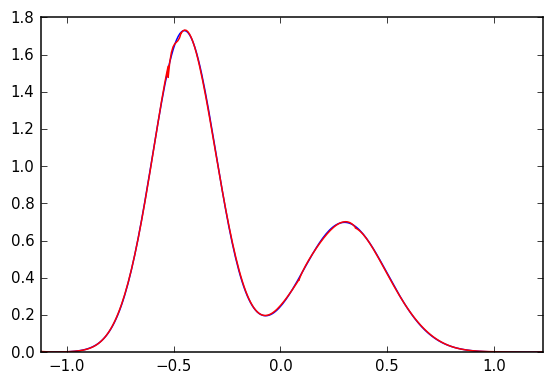

In [40]:
fig = plot_distribution(distribution, (smin, smax))
fig = poly_plot([res], (smin, smax), fig, ['red'])

This is the description of our piecewise-polynomial hypothesis.

In [41]:
sizes = [ppart.right - ppart.left for ppart in res]
weights = [ppart.right_sample_index - ppart.left_sample_index for ppart in res]
print('sizes: {}'.format(sizes))
print('weights: {}'.format(weights))
res

sizes: [0.59719667853483815, 0.061021628997231847, 0.55064123528364195, 0.26457192431949478, 0.87718204483844353]
weights: [100000, 50000, 200000, 80000, 70000]


[HypothesisPiece(left=-1.122874676784442, right=-0.52567799824960382, left_sample_index=0, right_sample_index=100000, hypothesis=array([ -232.5266328 , -1304.05730868, -3000.28212809, -3608.86188632,
       -2377.07451511,  -803.51767246,  -106.55113673])),
 HypothesisPiece(left=-0.52567799824960382, right=-0.46465636925237197, left_sample_index=100000, right_sample_index=150000, hypothesis=array([-1398.68049927,   406.23437538,   536.59017789,  -688.65975256,
        -116.58288565,   281.23475557,    86.34118152])),
 HypothesisPiece(left=-0.46465636925237197, right=0.08598486603126998, left_sample_index=150000, right_sample_index=350000, hypothesis=array([  2.78574107e+02,   4.04844624e+02,   8.09983901e+01,
        -3.09994633e+01,   5.33352708e+00,   1.30672905e+00,
         2.50769454e-01])),
 HypothesisPiece(left=0.08598486603126998, right=0.35055679035076476, left_sample_index=350000, right_sample_index=430000, hypothesis=array([ -3.35022396e+03,   4.63742355e+03,  -2.68547497e+0

In [42]:
res2 = pp_patch(res, eps * 4.0, samples)
sizes = [ppart.right - ppart.left for ppart in res2]
weights = [ppart.right_sample_index - ppart.left_sample_index for ppart in res2]
print('sizes: {}'.format(sizes))
print('weights: {}'.format(weights))
len(res2)

NOT YET IMPLEMENTED


UnboundLocalError: local variable 'mid_hyp' referenced before assignment

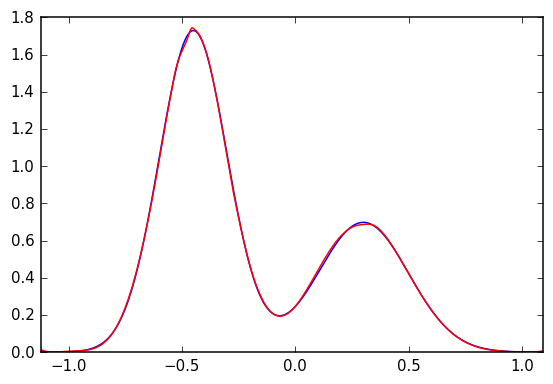

In [11]:
fig = plot_distribution(distribution, (smin, smax))
fig = poly_plot([res2], (smin, smax), fig, ['red'])

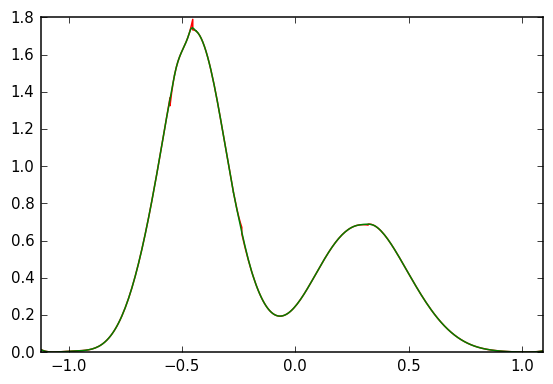

In [12]:
fig = poly_plot([res, res2], (smin, smax), colors=['red', 'green'])

In [13]:
l1_err_patched = compute_l1_quad(distribution.get_pdf(), get_ppoly_pdf(res2), (smin, smax))
print('\nPatched L1 error: {}'.format(l1_err_patched))


Patched L1 error: 0.00974002708088


In [79]:
l1_err = compute_l1_quad(distribution.get_pdf(), get_ppoly_pdf(res), (smin, smax))
print('\nL1 error: {}'.format(l1_err))


L1 error: 0.0109905163884


In [29]:
eps

0.03162277660168379

In [18]:
res2

[HypothesisPiece(left=-1.0157985394872107, right=-0.55881897941281622, left_sample_index=0, right_sample_index=3002, hypothesis=array([ -290.79010483, -1233.67004493, -2050.28497848, -1658.36650231,
        -646.21514352,   -95.24717173])),
 HypothesisPiece(left=-0.55881897941281622, right=-0.49218253770230402, left_sample_index=3002, right_sample_index=5002, hypothesis=array([  412692.64206131,  1098552.67228741,  1168526.89569841,
         620811.07125335,   164726.66951135,    17465.10077364])),
 HypothesisPiece(left=-0.49218253770230402, right=-0.43265239489078111, left_sample_index=5002, right_sample_index=7004, hypothesis=array([  931.0575932 ,  1300.0870922 ,  -619.70123747, -1610.20728651,
        -786.48283477,  -118.74055637])),
 HypothesisPiece(left=-0.43265239489078111, right=-0.37204369234506762, left_sample_index=7004, right_sample_index=9004, hypothesis=array([-311121.01375847, -624968.15550632, -500660.29969341,
       -199984.52872846,  -39844.52288214,   -3167.5775813

### Fitting splines as postprocessing doesn't actually work that well.
We fit a spline with degree 5 and use the boundaries between our polynomial pieces as knots.

In [206]:
spl, xs, ys = fit_spline(res, 2000, 5)

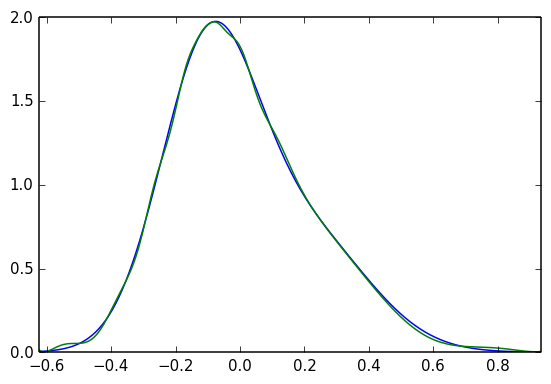

In [207]:
fig = plot_mixture(mixture, (smin, smax))
fig = spline_plot([spl], (smin, smax), fig)

Looks good. If we incorporate some smoothness conditions into our algorithm (e.g., bounded derivatives), we should directly get better looking results. Maybe we can also prove something about postprocessing.

In [194]:
from ellipsoid import *

In [195]:
compute_l1_mc(get_ppoly_pdf(res), spl, (smin, smax), num_points=1000000)

0.12475142222270463

In [196]:
compute_l1_mc(get_mixture_pdf(mixture), spl, (smin, smax), num_points=1000000)

0.12354726133860754